
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [336]:
# 0)
import seaborn as sns
import numpy as np
import pandas as pd
mpg = sns.load_dataset("mpg")



In [337]:
# 0a)

# EDA
print(mpg.info())

# Fixing nan values with drop
mpg.dropna(inplace=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [338]:
# 0b)
mpg.describe( exclude=["object"]).map(lambda x: x if type(x) == str else f"{x:.2f}")


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


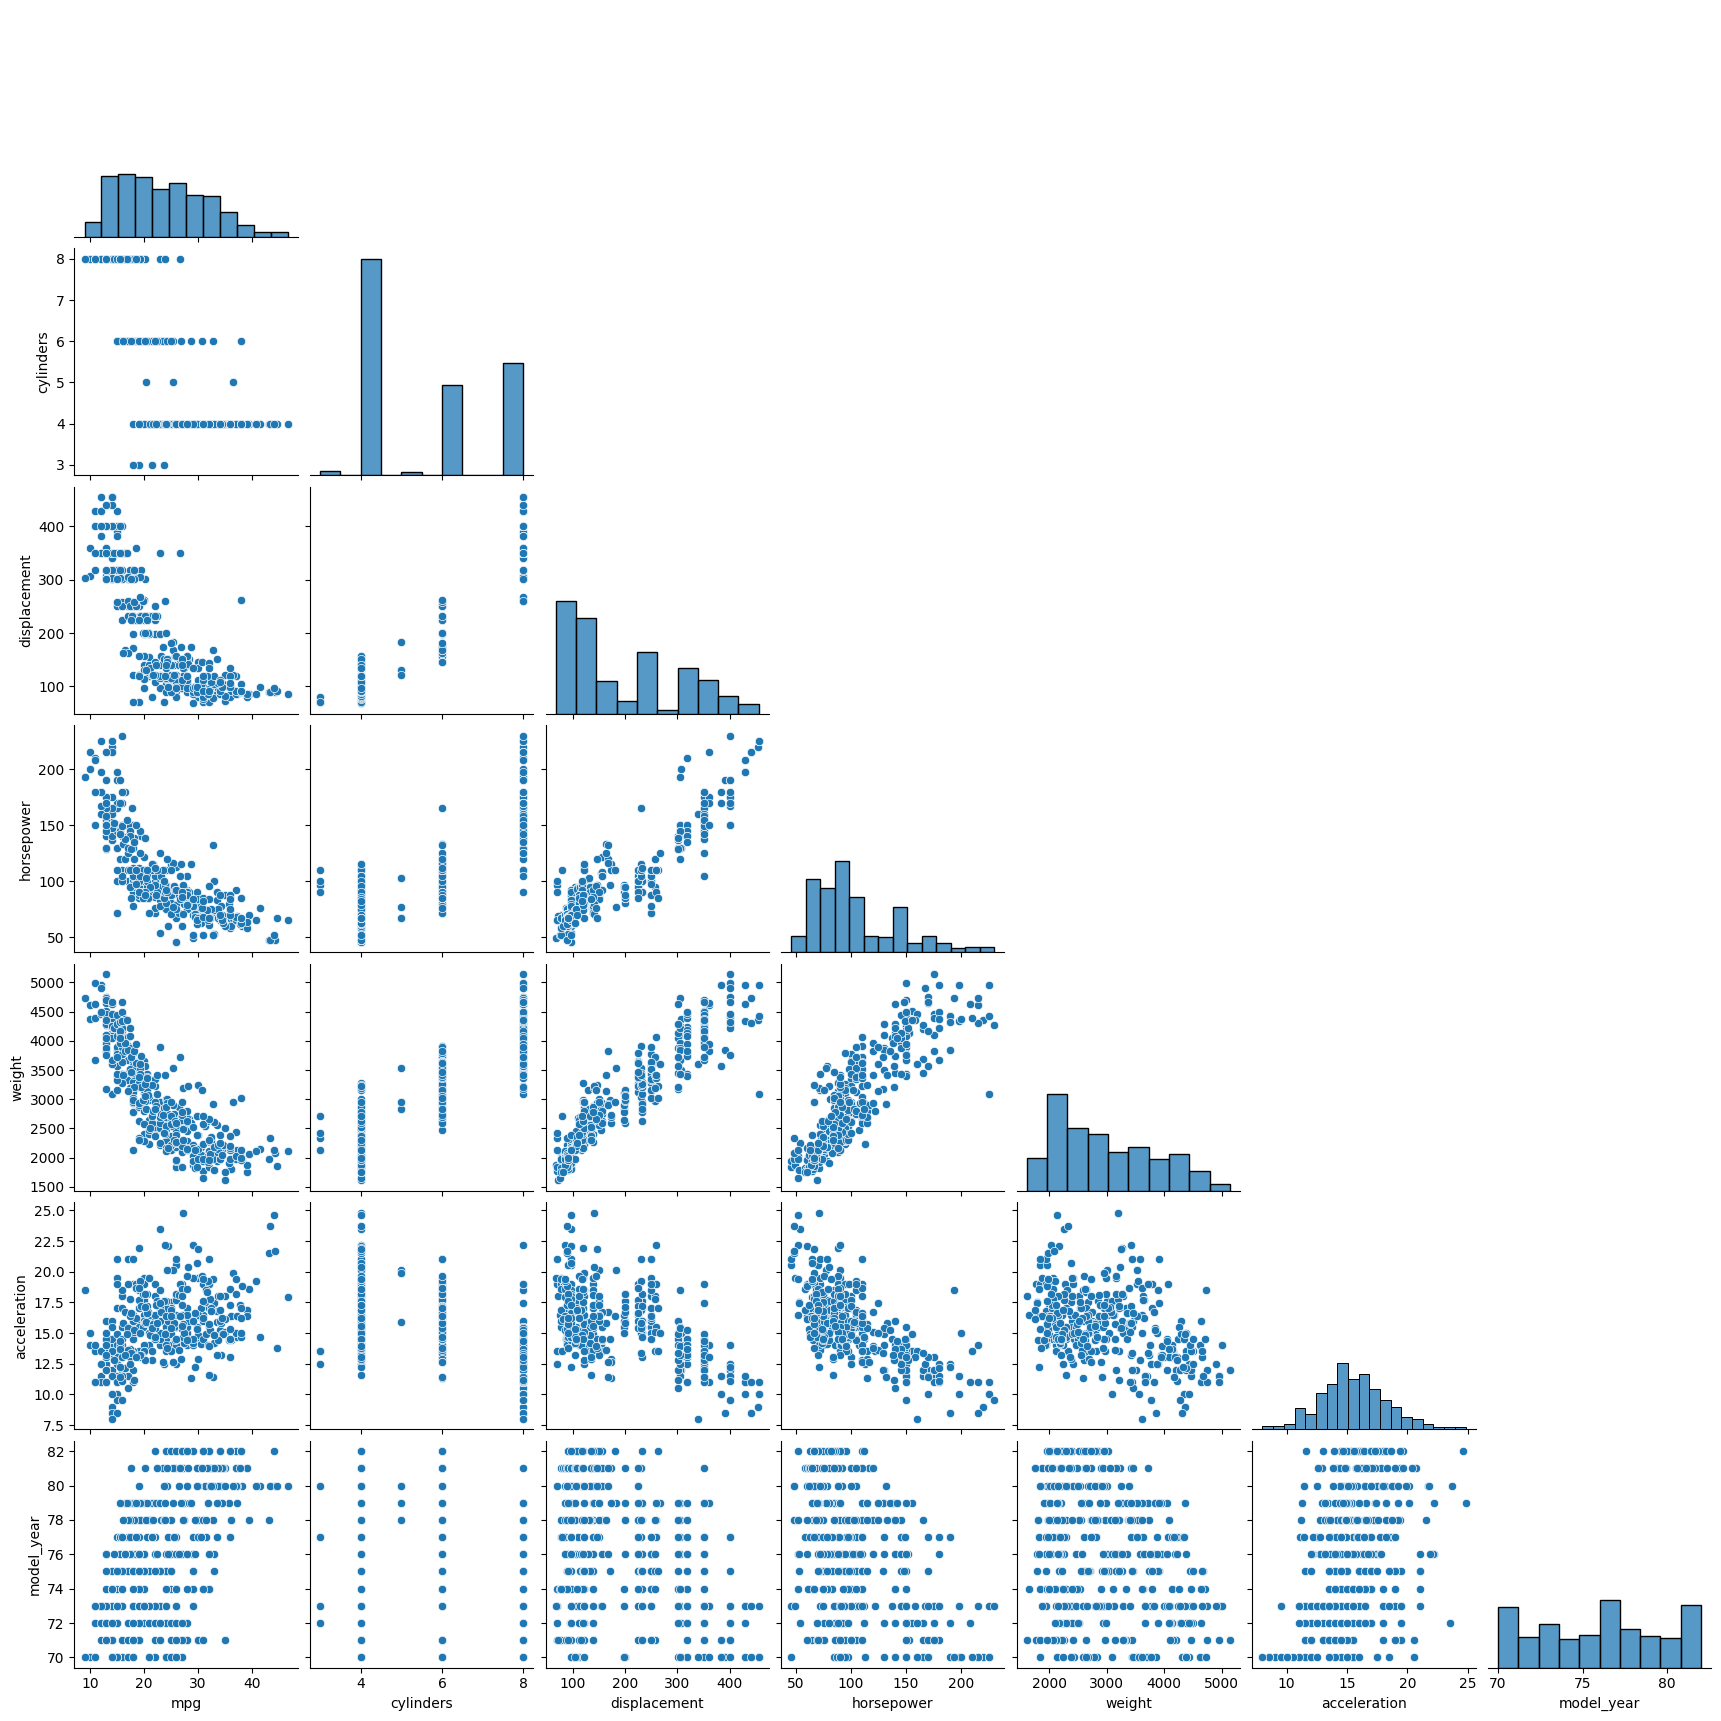

In [339]:
# 0c)
sns.pairplot(mpg, corner=True)

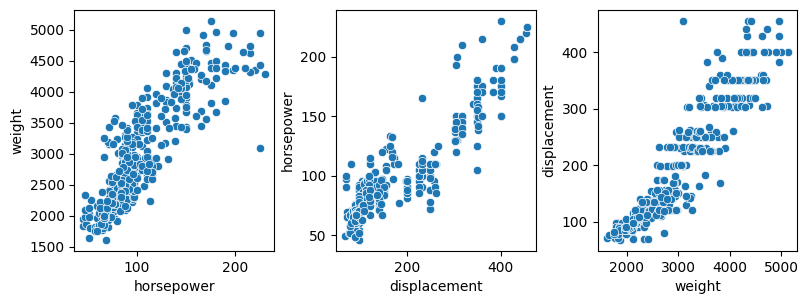

In [340]:
# 0c)
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,3, figsize=(8,3), dpi=100)
plt.tight_layout()

lia=["horsepower","displacement","weight"]
lib=["weight","horsepower","displacement"]
for idx, axie in enumerate(ax):
    sns.scatterplot(x=mpg[lia[idx]], y=mpg[lib[idx]], ax=axie)

In [341]:
# 0d)
mpg.drop(columns=["origin", "name"], inplace=True)
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [342]:
from sklearn.model_selection import train_test_split

# 1) Load Data Frame and Drop Columns
# mpg = sns.load_dataset("mpg")
# mpg.drop(columns=["cylinders", "acceleration", "model_year", "origin", "name"], inplace=True)

# 2) Fill nan Values
# mpg.sort_values("weight", ascending=True, inplace=True) 
# mpg["horsepower"] = mpg["horsepower"].ffill() 
# mpg.sort_index(ascending=True, inplace=True)

# 3) Define X and Y
X = mpg.drop(columns=["mpg"])
X["intercept"] = [1 for _ in range(X.shape[0])]
y = mpg["mpg"]


# 2) Split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((313, 7), (79, 7), (313,), (79,))

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [343]:


# 3) Train 
# ols = lambda X, Y: np.linalg.pinv( X.T @ X ) @ X.T @ Y
# b_train = ols(X_train,Y_train)
# Y_hat_test = X_test.values@b_train

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test)



# 4) Test 
def build_tests(y, y_hat, d):
    n = len(y)
    MAE  = np.divide(1, n) * np.sum(np.abs(y - y_hat))
    MSE  = np.divide(1, n) * np.sum(np.square(np.abs(y - y_hat)))
    RMSE = np.sqrt(MSE)
    RSE  = np.sqrt( np.divide(1, n-d) * np.sum(np.square(y - y_hat)))
    return MAE, MSE, RMSE

MAE, MSE, RMSE = build_tests(y_test, y_hat_test, X_test.shape[1])

print( f"MAE {MAE:.2f} | MSE {MSE:.2f} | RMSE {RMSE:.2f}" )


MAE 2.50 | MSE 10.50 | RMSE 3.24


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [344]:
# Linear Regression

from sklearn.linear_model import LinearRegression

# 0) Create Data Frame 
compare_models = pd.DataFrame()
compare_models.index = ["MAE", "MSE", "RMSE"]

# 1) Load Data Frame and Drop Columns
mpg = sns.load_dataset("mpg")

# 2) Fill / Drop nan Values
# mpg.sort_values("weight", ascending=True, inplace=True) 
# mpg["horsepower"] = mpg["horsepower"].ffill() 
# mpg.sort_index(ascending=True, inplace=True)
mpg.dropna(inplace=True)

# 3) Drop columns
mpg.drop(columns=["origin", "name"], inplace=True)

# 4) Define X and Y
X = mpg.drop(columns=["mpg"])
X["intercept"] = [1 for _ in range(X.shape[0])]
y = mpg["mpg"]

# 5) Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42 )


# 6) Train and Test Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test)

compare_models["Linear Regr. (SVD)"] = build_tests(y_test, y_hat_test, X_test.shape[1])



In [345]:
# Linear Regression : Skalerad
# You can scale before or after the split, both works

from sklearn.linear_model import LinearRegression

# 0) Create Data Frame 
#compare_models = pd.DataFrame()
#compare_models.index = ["MAE", "MSE", "RMSE", "RSE"]

# 1) Load Data Frame and Drop Columns
mpg = sns.load_dataset("mpg")

# 2) Fill / Drop nan Values
# mpg.sort_values("weight", ascending=True, inplace=True) 
# mpg["horsepower"] = mpg["horsepower"].ffill() 
# mpg.sort_index(ascending=True, inplace=True)
mpg.dropna(inplace=True)

# 3) Drop columns
mpg.drop(columns=["origin", "name"], inplace=True)

# 4) Define X and Y
X = mpg.drop(columns=["mpg"])
X["intercept"] = [1 for _ in range(X.shape[0])]
y = mpg["mpg"]


# 5) Scale and Split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # use the training data to fit the scaler
scaled_X_train = scaler.transform(X_train)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=.2, random_state=42 )

# 5) Split and Scale
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42 )
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train) # use the training data to fit the scaler
# scaled_X_train = scaler.transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# 7) Train and Test Linear Regression 
model = LinearRegression()
model.fit(scaled_X_train, y_train)
y_hat_test = model.predict(scaled_X_test)

compare_models["Linear Regr. (SVD) scaled"] = build_tests(y_test, y_hat_test, X_test.shape[1])
compare_models

,Linear Regr. (SVD),Linear Regr. (SVD) scaled
MAE,2.503860,2.503860
MSE,10.502370,10.502370
RMSE,3.240736,3.240736


In [346]:
# Polynomial
# You can polyfit before or after the split, the results are the same
from sklearn.preprocessing import PolynomialFeatures

for i in range(3):
    # The higher the degree the more complex the shape it can use to fit
    # Degree 1 is a simple line, that is why you get the same values as when 
    # you run a standard linear regression
    poly = PolynomialFeatures(degree = i+1)

    # Polyfit Beforesplit
    #X_poly = poly.fit_transform(X)  # For degree 1, X_poly will be the same as X, but it's good practice
    #X_train, X_test, y_train, y_test = train_test_split( X_poly, y, test_size=.2, random_state=42 )

    # Polyfit Aftersplit
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42 )
    X_train = poly.fit_transform(X_train)  # For degree 1, X_poly will be the same as X, but it's good practice 
    X_test = poly.fit_transform(X_test)  # For degree 1, X_poly will be the same as X, but it's good practice    

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)

    compare_models[f"Polyno. regr. Deg {i+1}"] = build_tests(y_test, y_hat_test, X_test.shape[1])
compare_models

C:\Users\adamt\AppData\Local\Temp\ipykernel_14396\3872286790.py:19: RuntimeWarning: invalid value encountered in sqrt
  RSE  = np.sqrt( np.divide(1, n-d) * np.sum(np.square(y - y_hat)))


,Linear Regr. (SVD),Linear Regr. (SVD) scaled,Polyno. regr. Deg 1,Polyno. regr. Deg 2,Polyno. regr. Deg 3
MAE,2.503860,2.503860,2.503860,1.980477,2.016258
MSE,10.502370,10.502370,10.502370,7.419858,8.114648
RMSE,3.240736,3.240736,3.240736,2.723942,2.848622



## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np

# For Fine Tune of Hyperparameter 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

class RegressionModel:
    def __init__(self, data, y_column, drop_columns):
        self.data_ = data
        self.y_column_ = y_column 
        self.drop_columns_ = drop_columns 
        self.df_compare = pd.DataFrame( index=["MAE","MSE","RMSE"])

        self.X = None 
        self.y = None
        self.df = None
        self.Xtr = None 
        self.Xte = None 
        self.ytr = None  
        self.yte = None

    # y = yte & y_hat = yte_hat
    def build_tests_(self, y_hat):
        y = self.yte
        n = len(y)
        d = self.X.shape[1]-1
        MAE  = np.divide(1, n) * np.sum(np.abs(y - y_hat))
        MSE  = np.divide(1, n) * np.sum(np.square(np.abs(y - y_hat)))
        RMSE = np.sqrt(MSE)
        RSE  = np.sqrt( np.divide(1, n-d) * np.sum(np.square(y - y_hat)))
        return MAE, MSE, RMSE
        
    def setup(self):
         # 1) Load data frame, drop nan values, drop columns
        self.df = self.data_.dropna().drop(columns=self.drop_columns_)
        self.X = self.df.drop(columns=self.y_column_)
        self.X["intercept"] = [1 for _ in range(self.X.shape[0])]
        self.y = self.df[self.y_column_]

    def split(self):
         self.Xtr, self.Xte, self.ytr, self.yte = train_test_split( self.X, self.y, test_size=.2, random_state=42)


    # Linear Regression 
    def linear_regression(self):
        Xtr, Xte, ytr = self.Xtr, self.Xte, self.ytr
        model = LinearRegression()
        model.fit(Xtr, ytr)
        yte_hat = model.predict(Xte)
        self.df_compare["Linear Regr. (SVD)"] = self.build_tests_(yte_hat)


    # Linear Regression Skaler 
    def linear_regression_scaler(self):
        scaler = MinMaxScaler()
        scaler.fit(self.Xtr) # use the training data to fit the scaler

        scaled_Xtr = scaler.transform(self.Xtr)
        scaled_Xte = scaler.transform(self.Xte)

        model = LinearRegression()
        model.fit(scaled_Xtr, self.ytr)
        yte_hat = model.predict(scaled_Xte)
        self.df_compare["Linear Regr. (SVD) scaled"] = self.build_tests_(yte_hat)


    # Polynomial
    def polynomial(self):
        for i in range(3):
            self.split()
            poly = PolynomialFeatures(degree = i+1)
            Xtr = poly.fit_transform(self.Xtr)
            Xte = poly.fit_transform(self.Xte)

            model = LinearRegression()
            model.fit(Xtr, self.ytr)
            yte_hat = model.predict(Xte)
            self.df_compare[f"Polyno. regr. Deg {i+1}"] = self.build_tests_(yte_hat)

    # Polynomila Hyperparamtere Fine Tuning
    def tuning(self):
        pipeline = Pipeline([
            ('poly', PolynomialFeatures()), # We'll set the degree later
            ('linear', LinearRegression())
        ])

        param_grid = {'poly__degree': [1, 2, 3, 4, 5]}  # The degrees to try

        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') #cv specifies the number of folds, scoring specifies how to evaluate the model.

        self.split()
        grid_search.fit(self.Xtr, self.ytr)
        best_degree = grid_search.best_params_['poly__degree']
        print("Best degree:", best_degree)
        return grid_search.best_estimator_  #The best model found. I asume you can use this
        

In [470]:
rm = RegressionModel(sns.load_dataset("mpg"), "mpg", ["name","origin"])
rm.setup()
rm.split()
rm.linear_regression()
rm.linear_regression_scaler()
rm.polynomial()
rm.df_compare
rm.tuning()


# - drop different columns

# - find out feature importance in polynomial models
#   Are features that changes the score when you go up one degree considered important(?)
#   I could make a loop that adds one column each iteration and checks if there 
#   is a differnces between Deg 2 and Deg 3

# - fine tune further for a specific model by exploring hyperparameters 
#   (check documentation which type of parameters that can be changed)

# mpg.columns

Best degree: 2
Best model: Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---